# 📘 Lesson 2: Exploring Feature Relationships & Basic Predictive Modeling

## 🧠 What You're Learning
In this lesson, we’ll explore how each feature (like speed or jockey rating) relates to a horse’s chance of winning. Then, we'll build a simple linear regression model that estimates win probabilities — and compare it to the bookmaker odds.

The goal is to take our first step toward identifying value bets.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set(style="whitegrid")
np.random.seed(42)

# Sample horses and features
horses = [
    "Silver Arrow", "Midnight Thunder", "Golden Mirage", "Ocean Tempest",
    "Velvet Hammer", "Crimson Star", "Shadow Dancer", "Epsom Glory",
    "Lunar Majesty", "Fleet Justice"
]

data = pd.DataFrame({
    "Horse": horses,
    "Jockey_Rating": np.random.uniform(70, 100, len(horses)).round(1),
    "Trainer_Win_%": np.random.uniform(5, 25, len(horses)).round(1),
    "Speed_Rating": np.random.uniform(80, 110, len(horses)).round(1),
    "Form_Last3": np.random.randint(1, 10, len(horses)),
    "Odds_Decimal": np.random.uniform(3.0, 20.0, len(horses)).round(1)
})

# Calculate bookmaker's implied probability
data["Implied_Prob"] = (1 / data["Odds_Decimal"]).round(4)
data


,Horse,Jockey_Rating,Trainer_Win_%,Speed_Rating,Form_Last3,Odds_Decimal,Implied_Prob
0,Silver Arrow,81.2,5.4,98.4,3,3.3,0.3030
1,Midnight Thunder,98.5,24.4,84.2,7,6.9,0.1449
2,Golden Mirage,92.0,21.6,88.8,5,7.1,0.1408
3,Ocean Tempest,88.0,9.2,91.0,9,14.6,0.0685
4,Velvet Hammer,74.7,8.6,93.7,7,13.4,0.0746
5,Crimson Star,74.7,8.7,103.6,2,17.2,0.0581
6,Shadow Dancer,71.7,11.1,86.0,4,5.9,0.1695
7,Epsom Glory,96.0,15.5,95.4,9,9.6,0.1042
8,Lunar Majesty,88.0,13.6,97.8,2,6.1,0.1639
9,Fleet Justice,91.2,10.8,81.4,9,15.8,0.0633


## 🔍 Exploring Feature Relationships

Before building a model, it's important to explore how each feature relates to the outcome we're trying to predict — in this case, the bookmaker's implied win probability.

We’ll create scatter plots to check for trends and correlations.


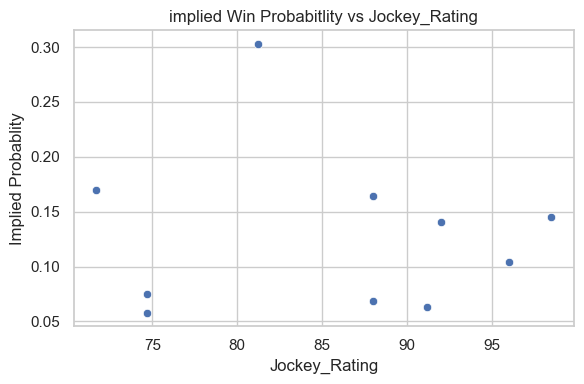

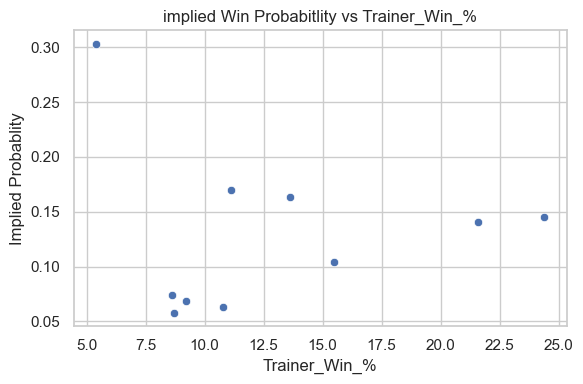

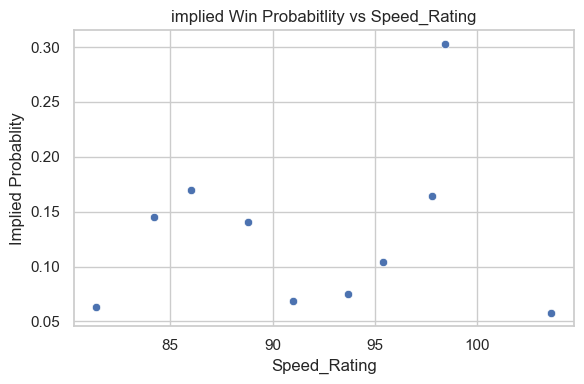

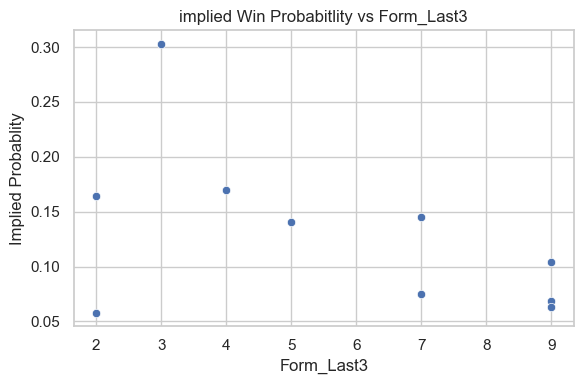

In [6]:
# Features to explore
features = ["Jockey_Rating", "Trainer_Win_%", "Speed_Rating", "Form_Last3"]

#Plot each feature vs Implied_Prob
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=feature, y="Implied_Prob")
    plt.title(f"implied Win Probabitlity vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Implied Probablity")
    plt.tight_layout()
    plt.show()

### 🧠 What Do These Plots Show?

We're looking for trends between each feature and the bookmaker's implied win probability:

- **Jockey Rating**: Do better jockeys correlate with higher win chances?
- **Trainer Win %**: Do horses from higher-performing stables have shorter odds?
- **Speed Rating**: Are faster horses more favoured in the market?
- **Form_Last3**: Do horses that finished well recently have better odds?

Any visible trend here helps us decide which features might be predictive — and are worth including in our first model.


## 🤖 Building a Simple Predictive Model

Now we'll build a linear regression model to predict the bookmaker's implied win probability, using our four features.

We’re not trying to beat the bookmaker just yet — we're simply testing whether these features contain enough signal to explain the market’s view.


In [10]:
from sklearn.linear_model import LinearRegression

#Select features and target
X = data[["Jockey_Rating", "Trainer_Win_%", "Speed_Rating", "Form_Last3"]]
y = data["Implied_Prob"]

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict probabilities
data["Model_Prob"] = model.predict(X).clip(0, 1).round(4)
data[["Horse", "Implied_Prob", "Model_Prob"]]

,Horse,Implied_Prob,Model_Prob
0,Silver Arrow,0.3030,0.1959
1,Midnight Thunder,0.1449,0.1224
2,Golden Mirage,0.1408,0.1375
3,Ocean Tempest,0.0685,0.0863
4,Velvet Hammer,0.0746,0.0598
5,Crimson Star,0.0581,0.1431
6,Shadow Dancer,0.1695,0.1377
7,Epsom Glory,0.1042,0.0677
8,Lunar Majesty,0.1639,0.2059
9,Fleet Justice,0.0633,0.1344


### 🔍 What This Code Does

- We’re using **Linear Regression** to predict `Implied_Prob` using the four input features.
- The `.clip(0, 1)` makes sure our model doesn't output impossible probabilities (e.g. < 0 or > 1).
- Now we have two probabilities per horse:
  - **Implied_Prob** from the market
  - **Model_Prob** from our model


## 📊 Model vs Market

To evaluate our model, we’ll plot our predicted probabilities against the bookmaker’s implied probabilities.

This shows where the model agrees with the market, and where it diverges — which could point to value betting opportunities.


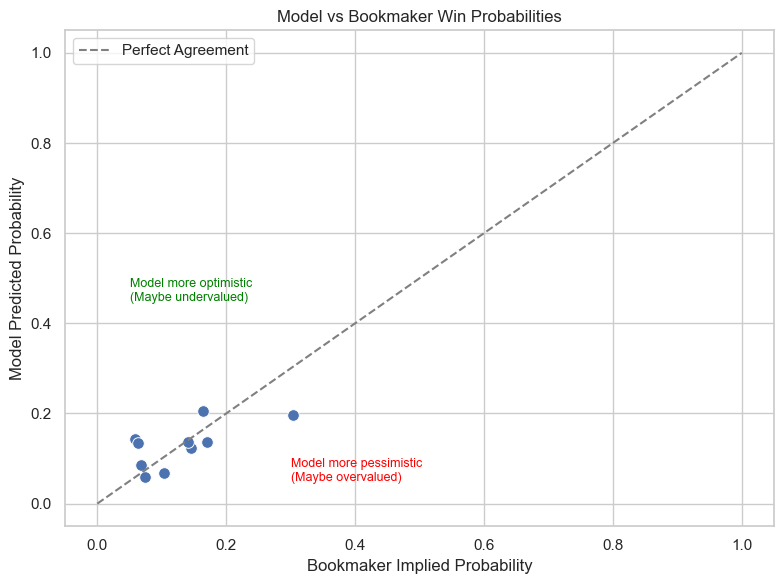

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="Implied_Prob", y="Model_Prob", s=70)

# Diagonal line = perfect agreement
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Perfect Agreement")

# Annotate above/below line
plt.text(0.05, 0.45, "Model more optimistic\n(Maybe undervalued)", fontsize=9, color="green")
plt.text(0.3, 0.05, "Model more pessimistic\n(Maybe overvalued)", fontsize=9, color="red")
# Labels & title
plt.xlabel("Bookmaker Implied Probability")
plt.ylabel("Model Predicted Probability")
plt.title("Model vs Bookmaker Win Probabilities")
plt.legend()
plt.tight_layout()
plt.show()


### 🧠 What This Plot Means

Each dot represents one horse:

- The **X-axis** shows what the bookmaker thinks (Implied Probability from odds)
- The **Y-axis** shows what *our model* thinks (based on features)

The diagonal line means perfect agreement — model and market fully aligned.

- 🔺 Dots **above the line** = horses our model likes **more than the market**  
  → These might be **undervalued** and worth betting on

- 🔻 Dots **below the line** = horses our model is **less confident** about  
  → The market might be **overestimating** them


## 💰 Spotting Value: Model vs Market

Let’s create a new column that shows the difference between our model’s predicted win probability and the bookmaker’s implied probability.

Positive values suggest our model sees a better chance of winning than the market does — a possible **value betting opportunity**.
